¡Hola, Lucia!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Lucia! Has hecho un excelente trabajo con los ajustes, cada vez más cercas de convertirte en una analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

Paso 1. Abre el archivo de datos y estudia la información general 
1.1. Importar las librerias
1.2. Cargar los datos
1.3. Verificar que tipo de datos tengo, si hay nulos, si estan adecuadamente o los tengo que cambiar entre otros problemas que pueda tener antes de comenzar a utilizar mis datos

In [5]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Cargar los datos

df= pd.read_csv ("/datasets/games.csv")

#Muestra los datos de las primeras 5 filas
print(df.head())

#Muestra el tipo de informacion tiene mis datos
print(df.info())

#Muestra un resumen estadistico de mis datos
print(df.describe())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias. 

Paso 2. Prepara los datos
2.1. Renombrar las columnas, pasar a minisculas y separar con guion bajo
2.2. Convertir los tipos de datos correctos
2.3. Manejar valores ausentes 

In [6]:
# Renombrar las columnas a minisculas
df.columns=df.columns.str.lower()
#Le doy info para verificar si el cambio se realizo correctamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [7]:
#Pasar los datos de la columna year_of_release a entero porque esta en float
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')
#Le doy info para verificar si el cambio se realizo correctamente
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB
None


In [8]:
# Revisar valores únicos en user_score para identificar problemas
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Encontre en la columna user_score valores nulos o ausentes NaN y tbd (To be determined), ademas los valores son objetos y yo necesito requiero floats

In [9]:
#reemplazare tbd por NaN ya que tbd no tienen un valor numerico
df['user_score'] = df['user_score'].replace('tbd', np.nan)

#Covertire de objet a float
df['user_score'] = df['user_score'].astype(float)

Una vez que hice esto, tengo que decididir con que llenar los valores ausentes,en este caso verificare si usar la media o la mediana.

In [10]:
media_score = df['user_score'].mean()
print(f" Valor de la media es : {media_score}")
mediana_score = df['user_score'].median()
print(f" Valor de la mediana es : {mediana_score}")


 Valor de la media es : 7.125046113306982
 Valor de la mediana es : 7.5


Verificando la media y la mediana, la media es menor por lo que es posible que tengas valores bajos o atipicos, por lo que usaremos la mediana para completar los valores ausentes de user_score

In [11]:
# Rellenamos NaN con la mediana
df['user_score'].fillna(mediana_score, inplace=True)

In [12]:
#Ahora bien la columna name y genre tienen valores ausentes, como son dos y no es siginificativa la cantidad la eliminare
df.dropna(subset=['name', 'genre'], inplace=True)
#Verifico si se elimino
df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score            0
rating             6764
dtype: int64

Aun tengo valores ausentes en year_of_release, critic_score y rating, tengo que evaluar que hacer con ellos  ellos y si son significativos para mi analisis. 

Para year_of_release lo completare la moda, podria usar la media o la mediana pero para este caso como es un año prefiero usar la moda, eliminarla la columna no es una opcion ya que la necesitare para mi analisis y eliminar las filas con los 269 datos tampoco es viable perderia informacion. 

Para la columna critic score tiene mas de la mitad de los valores nulos, eliminarlo tendria un gran impacto en mi analisis por lo que lo completare con la mediana para evitar sesgos extremos.

Para rating tengo dos opciones eliminarlo porque en la premisa incial indica que identificar patrones que determinen si un juego tiene éxito o no, usando reseñas, géneros, plataformas y ventas históricas


In [13]:
#Para year_of_release lo completamos con la moda
df['year_of_release'].fillna(df['year_of_release'].mode()[0], inplace=True)

#Para critic_score lo completamos con la mediana
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)

#Para rating eliminaremos la columna
df.drop(columns=['rating'], inplace=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
dtypes: Int64(1), float64(6), object(3)
memory usage: 1.4+ MB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo completando los valores nulos con la mediana

Una vez terminado de revisar la data y tratar los datos ausentes realizare el calculo de las ventas totales, que es la suma de las ventas en toda las regiones na_sales, eu_sales,y jp_sales y other_sales, esta nueva columna la llamare total_sales.

In [14]:
# Crear una nueva columna con las ventas totales
df["total_sales"] = df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(3)
memory usage: 1.5+ MB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 



Como ultimo paso aplique info para verificar la creacion de la nueva columna total_sales, verificar que no tenga datos nulos y que sean del tipoe adecuado para el analisis.

Paso 3. Analiza los datos

Para calcular la cantidad de lanzamientos por año y verificar si hay períodos con más o menos lanzamientos haremos un grafico de barras

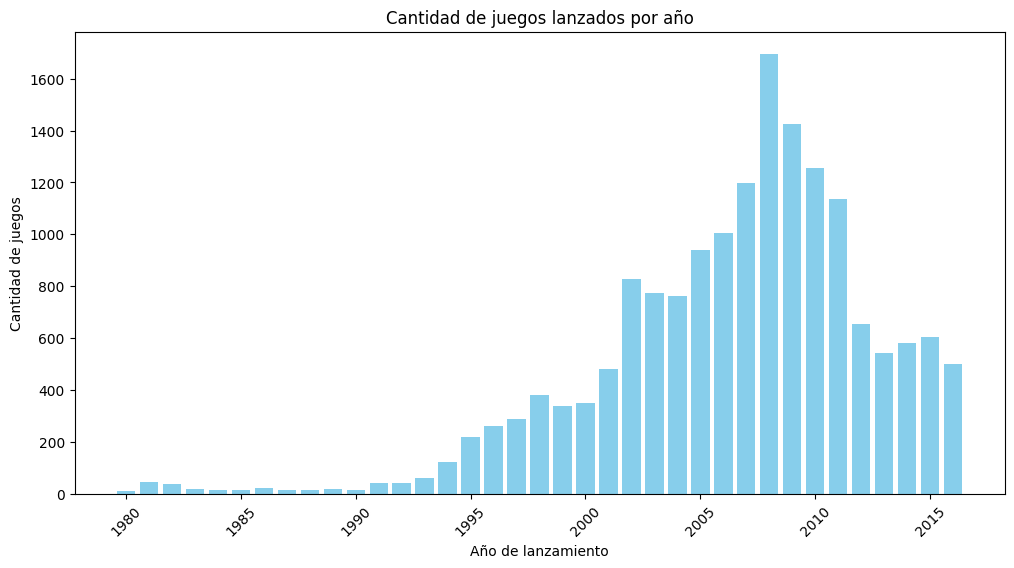

In [15]:
# Contamos la cantidad de juegos por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Luego el grafico de barras
plt.figure(figsize=(12,6))
plt.bar(games_per_year.index, games_per_year.values, color='skyblue')
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.title("Cantidad de juegos lanzados por año")
plt.xticks(rotation=45)  
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo




Segun los datos podemos ver que la cantidad de juegos lanzados varió significativamente a lo largo del tiempo. Se observa un crecimiento sostenido desde los años 90, alcanzando su punto máximo entre 2005 y 2010, con un pico notable en 2008 y 2009. Posteriormente, hubo una disminución en la cantidad de lanzamientos, lo que podría estar relacionado con cambios en el mercado, nuevas tendencias en la industria o una consolidación de plataformas.

Además, verificamos que la imputación de valores faltantes con la mediana en la variable year_of_release no afectó significativamente la distribución general de los datos, ya que solo 269 de los 16,713 registros fueron modificados.

Ahora, observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

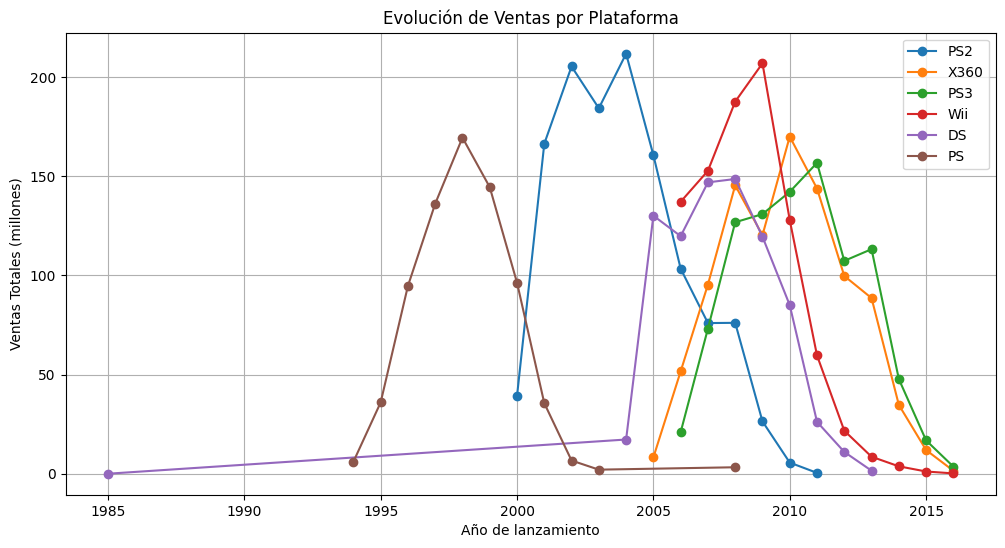

In [16]:
#primero vamos a visualizar las ventas de las plataformas a lo largo de los años
# Agrupar ventas por plataforma y año
ventas_por_plataforma = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Seleccionar las plataformas con mayores ventas totales
top_plataformas = ventas_por_plataforma.groupby('platform')['total_sales'].sum().nlargest(6).index

# Filtrar datos solo de las plataformas principales
ventas_top = ventas_por_plataforma[ventas_por_plataforma['platform'].isin(top_plataformas)]

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
for plataforma in top_plataformas:
    subset = ventas_top[ventas_top['platform'] == plataforma]
    plt.plot(subset['year_of_release'], subset['total_sales'], marker='o', label=plataforma)

# Personalizar gráfico
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas Totales (millones)")
plt.title("Evolución de Ventas por Plataforma")
plt.legend()
plt.grid(True)
plt.show()


Del grafico de lineas podemos inferir varias cosas y responder las pregunta planteadas. 

El gráfico muestra cómo evolucionan las ventas de las principales plataformas a lo largo del tiempo. Se nota que cada una sigue un ciclo: crecimiento, pico y caída
Ademas puedo decir que, las mas vendidas fueron PS2 y Wii, con picos altos; las que ya no tienen ventas: PS, PS2 y Wii dejaron de venderse después de 2013-2015.
Con respecto al timepo de vida podria decir que las plataformas tardan entre 2-4 años en alcanzar su pico y luego 5-7 años en desaparecer.
Cabe señalar que existen otros factores que pueden influir su caida, por ejemplo, si aparecia un equipo mas moderno al año anterior lo cual ofrecia a los consumidores mejores experiencias, definitivamente el mas moderno o mas actualizado sera elegido por los consumidores antiguo y nuevos.

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Para construir un modelo para el 2017, segun los graficos y el analisis realizado los datos más relevante son desde el 2005 en adelante. Esto se debe a que las plataformas suelen durarun promedio de 5 y 10 años, y este rango contempla las más recientes en lanzamientos y ventas. Los datos anteriores a 2000 tienen poca relevancia, ya que muchas plataformas ya no existen en el mercado o simplemente no son relevantes para el analisis.

Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
En este caso vamos a quedarnos solo con los del 2005 en adelante para el analisis de prediccion del 2017, la cual ha guardare en df_relevante.

In [17]:
df_relevante = df[df['year_of_release'] >= 2005]

# Verificar los primeros registros
print(df_relevante.head())

                    name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score  total_sales  
0     28.96      3.77         8.45          76.0         8.0        82.54  
2     12.76      3.79         3.29          82.0         8.3        35.52  
3     10.93      3.28         2.95          80.0         8.0        32.77  
6      9.14      6.50         2.88          89.0         8.5        29.80  
7      9.18      2.93         2.84          58.0         6.6        28.91  


¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
Las plataformas con mayores ventas han sido PS2, X360, PS3, Wii y DS en distintos momentos. Se nota que PS3 y X360 crecieron hasta 2010, mientras que PS2, Wii y DS han bajado sus ventas después de ese año. Para elegir plataformas rentables, conviene enfocarse en PS3 y X360, ya que aún tenían buenas ventas en los últimos años analizados.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

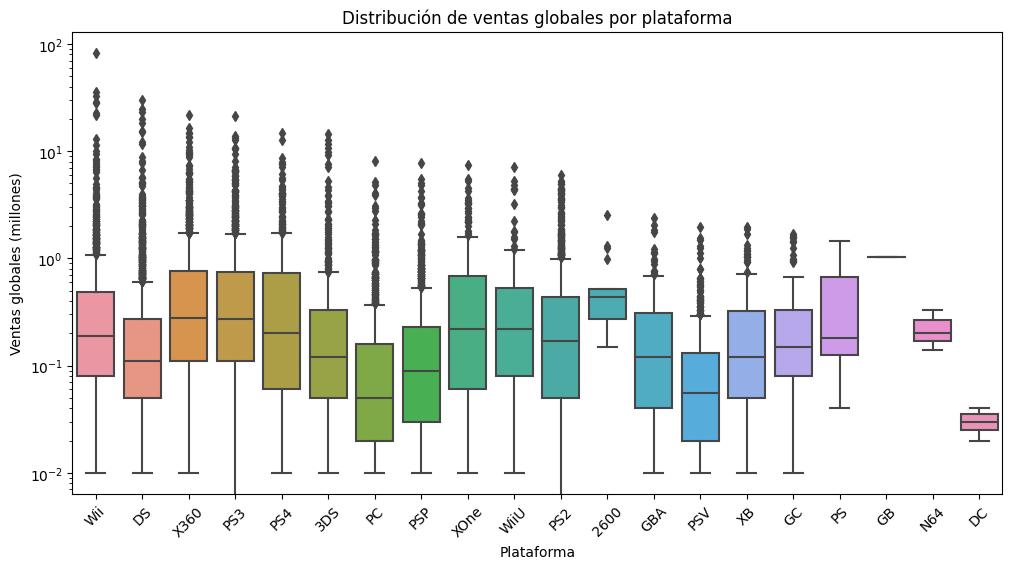

In [18]:
#Defino el tamaño del grafico
plt.figure(figsize=(12, 6))
#Creamos el diagrama de caja (boxplot)
sns.boxplot(x="platform", y="total_sales", data=df_relevante)
# Aplicamos una escala logarítmica en el eje Y, para visualizar mejor los datos ya que las ventas varian mucho
plt.yscale("log")  
#Definimos la inclinacion de los rotulos
plt.xticks(rotation=45)  
#Rotulamos el diagrama
plt.title("Distribución de ventas globales por plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales (millones)")
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

SEGUN EL COMENTARIO REALIZADO AQUI DEJO MI NUEVO ANALISIS SIN BORRAR EL ANTERIOR ANALISIS QUE SE REALICE

En el análisis de la distribución de ventas globales por plataforma, se pueden observar diferencias significativas entre ellas. Algunas plataformas, como PS2, Wii y X360, presentan una mediana de ventas más alta y una mayor dispersión de datos, lo que indica que ciertos juegos han logrado un éxito notable en comparación con el resto. Por otro lado, plataformas como PC y PSP tienen ventas más bajas y menos variabilidad, lo que sugiere que los juegos en estas plataformas no alcanzaron ventas tan elevadas en promedio.

Un aspecto clave que revela el diagrama de caja es la presencia de numerosos valores atípicos (outliers), que corresponden a juegos con ventas excepcionalmente altas en comparación con la mayoría. Estos outliers pueden influir en los resultados estadísticos y, si no se manejan adecuadamente, pueden sesgar las pruebas de hipótesis. Por ello, antes de aplicar pruebas estadísticas, es fundamental analizar estos valores atípicos y determinar si deben excluirse o si representan información relevante para el estudio.

A partir de este análisis, se pueden extraer algunas conclusiones clave. Las plataformas con mayores ventas y mayor potencial son PS2, Wii, X360 y PS3, ya que presentan medianas altas y varios juegos con ventas excepcionales. En contraste, PC, PSP y DC parecen ser menos rentables, pues su mediana de ventas es baja y muestran menor dispersión en los datos. Finalmente, para realizar predicciones en 2017, PS4, XOne y PC serían las plataformas más relevantes, ya que eran las más utilizadas en ese año.

ANTIGUA INTERPRETACION NO LA BORRE POR QUE INDICASTE QUE NO BOORARA NADA O ESO ENTENDI

Segun el grafico podemos contestar las preguntas de la premisa

¿Son significativas las diferencias en las ventas?
Sí, hay diferencias notables entre plataformas. Algunas, como PS2, Wii y X360, muestran ventas más altas en promedio y una mayor dispersión en los datos, lo que indica que algunos juegos vendieron mucho más que otros. Otras plataformas, como PC y PSP, tienen ventas más bajas y menos variabilidad.

¿Qué sucede con las ventas promedio en varias plataformas?
Las plataformas como PS2, Wii y X360 tienen una mediana más alta, lo que indica que la mayoría de sus juegos vendieron mejor en comparación con otras plataformas. En cambio, PC y PSP tienen medianas más bajas, lo que sugiere que los juegos en estas plataformas tienden a vender menos en promedio.

Además, hay muchas plataformas con valores atípicos (puntos fuera del rango normal), lo que indica que algunos juegos lograron ventas excepcionales, sobre todo en consolas populares.

Lo cual se puede inferir o conlcuir de este analisis que 
1.Las plataformas con mejores ventas y más potencial son PS2, Wii, X360 y PS3, ya que tienen una mediana alta y muchas ventas excepcionales.
2.Las plataformas menos rentables parecen ser PC, PSP y DC, ya que su mediana es baja y la dispersión es menor.
3️.Para hacer predicciones en 2017, es mejor enfocarse en PS4, XOne y PC, porque son las plataformas con mayor relevancia en ese año.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular en este caso eligire PS4. Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

In [19]:
#Como elegi PS4 voy a filtrar los datos para esta plataforma 
df_ps4 = df_relevante[df_relevante["platform"] == "PS4"]

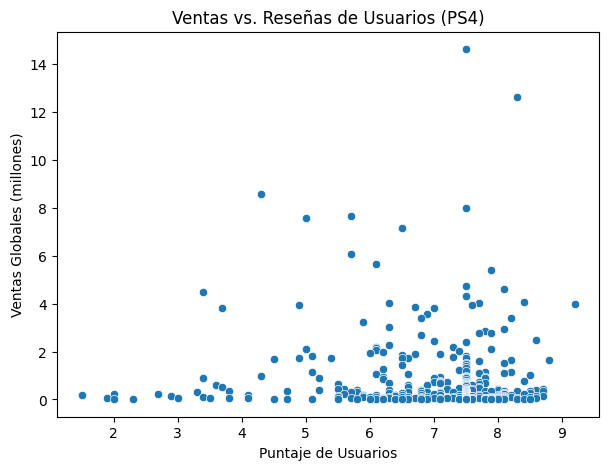

In [20]:
# Ahora creare un primer grafico de dispersion donde mostrare la relacion entre reseñas de usuarios y las ventas

plt.figure(figsize=(7, 5))
sns.scatterplot(x=df_ps4["user_score"], y=df_ps4["total_sales"])
plt.title("Ventas vs. Reseñas de Usuarios (PS4)")
plt.xlabel("Puntaje de Usuarios")
plt.ylabel("Ventas Globales (millones)")
plt.show()

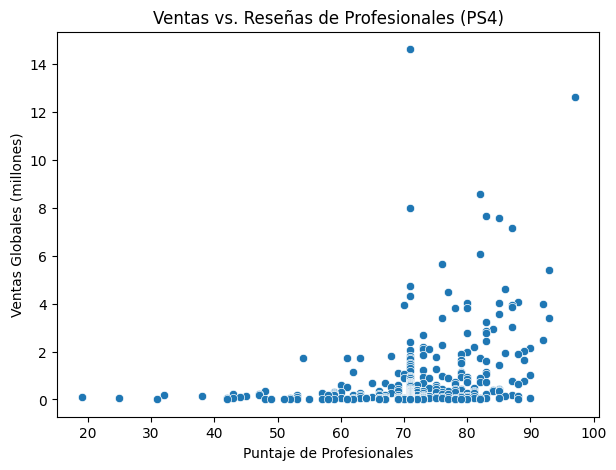

In [21]:
# Ahora creare un segundo grafico donde mostrare la relacion entre las reseñas de profesionales y las ventas.
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df_ps4["critic_score"], y=df_ps4["total_sales"])
plt.title("Ventas vs. Reseñas de Profesionales (PS4)")
plt.xlabel("Puntaje de Profesionales")
plt.ylabel("Ventas Globales (millones)")
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

In [22]:
#Finalmente tengo que calcular correlaciones que existen y analisarlo

correlacion_usuarios = df_ps4["user_score"].corr(df_ps4["total_sales"])
correlacion_profesionales = df_ps4["critic_score"].corr(df_ps4["total_sales"])

print(f"Correlación entre reseñas de usuarios y ventas: {correlacion_usuarios:.2f}")
print(f"Correlación entre reseñas de profesionales y ventas: {correlacion_profesionales:.2f}")

Correlación entre reseñas de usuarios y ventas: -0.06
Correlación entre reseñas de profesionales y ventas: 0.34


Conclusiones
Las reseñas de usuarios tienen poca o ninguna relación con las ventas de juegos en PS4 (correlación de -0.06). Esto indica que un puntaje alto o bajo de los jugadores no necesariamente impacta en el éxito comercial del juego.

Las reseñas de profesionales muestran una correlación moderada con las ventas (0.34), lo que sugiere que las calificaciones de expertos pueden influir en la demanda, aunque no son el único factor determinante.

Otros factores, como la popularidad de la franquicia, el marketing y la distribución, probablemente tienen un mayor impacto en las ventas que las reseñas por sí solas.

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas

In [23]:
#Primero filtrar los juegos multiplataforma
# Contar cuántas veces aparece cada juego
juegos_por_plataforma = df_relevante["name"].value_counts()

# Filtrar solo los juegos que están en más de una plataforma
juegos_multiplataforma = juegos_por_plataforma[juegos_por_plataforma > 1].index

# Crear un nuevo DataFrame con solo estos juegos
df_multiplataforma = df_relevante[df_relevante["name"].isin(juegos_multiplataforma)]

In [24]:
#Agrupar por juego y plataforma y sumandole las ventas totales
ventas_por_plataforma = df_multiplataforma.groupby(["name", "platform"])["total_sales"].sum().reset_index()


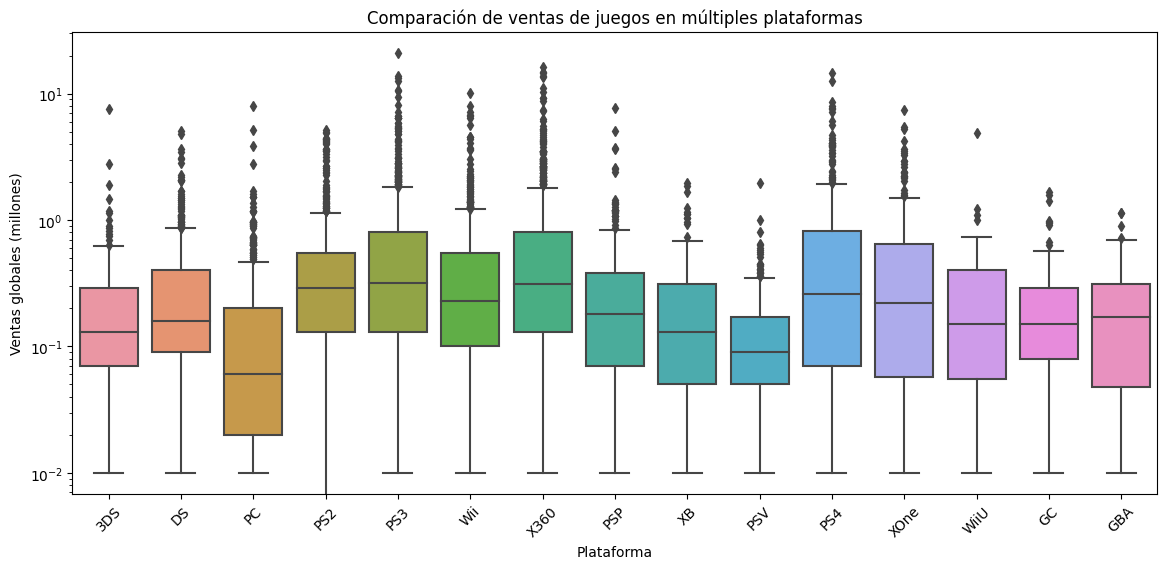

In [25]:
#Visualizaremos los datos usando un gráfico de barras para ver la comparación de ventas
plt.figure(figsize=(14, 6))
sns.boxplot(x="platform", y="total_sales", data=ventas_por_plataforma)
plt.xticks(rotation=45)
plt.title("Comparación de ventas de juegos en múltiples plataformas")
plt.xlabel("Plataforma")
plt.ylabel("Ventas globales (millones)")
plt.yscale("log") 
plt.show()


Las ventas de un mismo juego varían según la plataforma. Consolas como PS4, Xbox 360, Wii y PS2 muestran mejores ventas en promedio, mientras que plataformas como PSVita, GameCube y Wii U tienen ventas más bajas.

Se observan outliers en todas las plataformas, lo que indica que algunos títulos específicos han impulsado las ventas. En PC, la variabilidad es alta, lo que sugiere que no todos los juegos multiplataforma tienen el mismo éxito.

En general, los juegos multiplataforma tienden a vender mejor en consolas con una gran base de usuarios, lo que confirma que la popularidad de la plataforma influye en el éxito comercial de un juego.

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

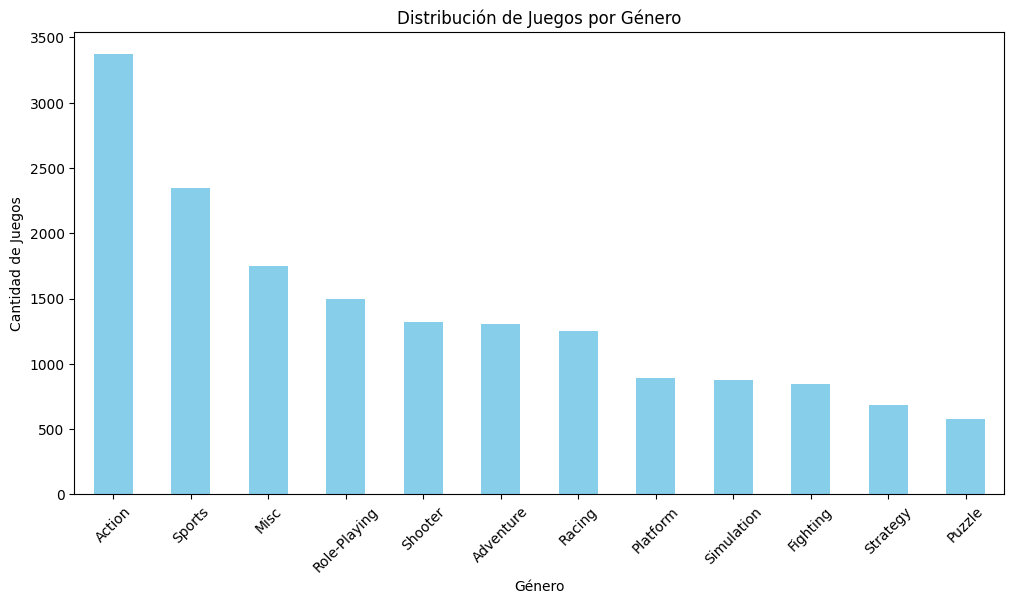

In [26]:
#Visualizar la distribución de juegos por género
# Contar el número de juegos por género
genre_counts = df["genre"].value_counts()

# Graficar la distribución de juegos por género
plt.figure(figsize=(12, 6))
genre_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Género")
plt.ylabel("Cantidad de Juegos")
plt.title("Distribución de Juegos por Género")
plt.xticks(rotation=45)
plt.show()

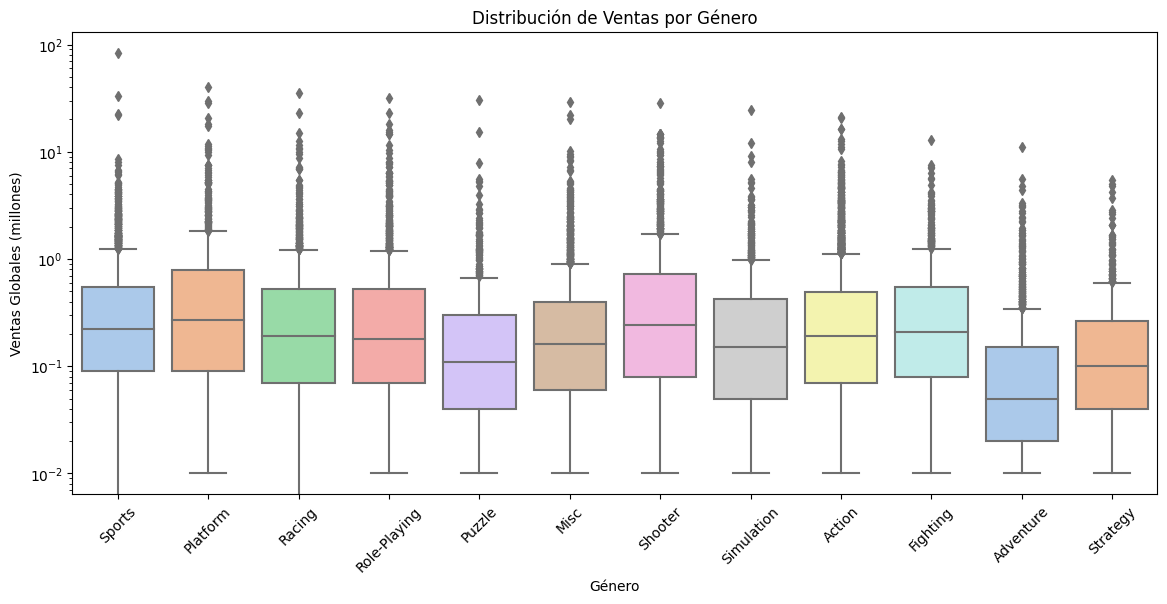

In [27]:
#Analizar las ventas por género para ello creare el un grafico boxplot de ventas por género
plt.figure(figsize=(14, 6))
sns.boxplot(x="genre", y="total_sales", data=df, palette="pastel")
plt.yscale("log")  
plt.xlabel("Género")
plt.ylabel("Ventas Globales (millones)")
plt.title("Distribución de Ventas por Género")
plt.xticks(rotation=45)
plt.show()

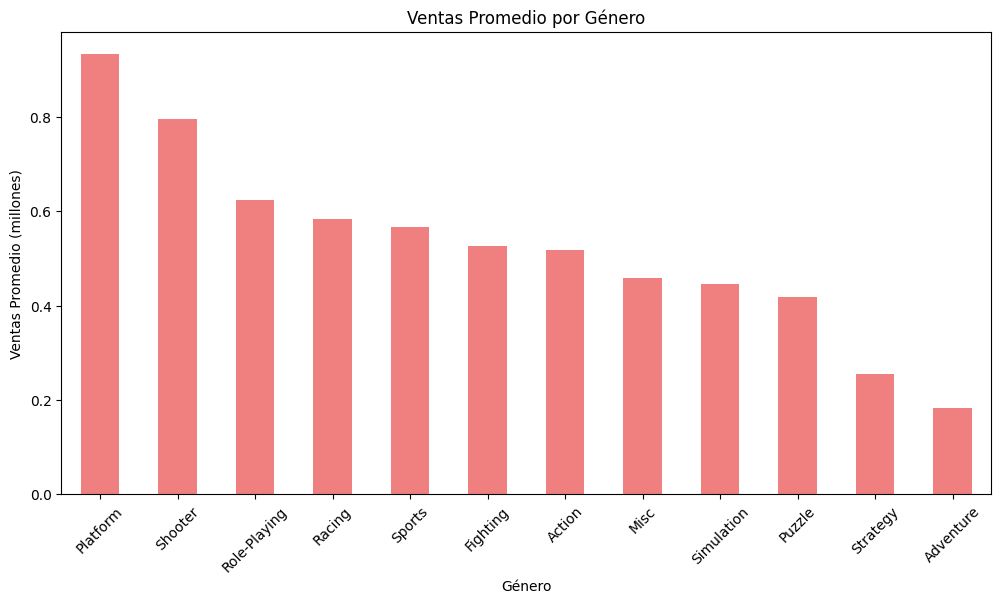

In [28]:
#Comparar géneros con ventas altas y bajas, aquí calculamos las ventas promedio por género para identificar 
#los más y menos rentables.
# Calcular ventas promedio por género
genre_sales_avg = df.groupby("genre")["total_sales"].mean().sort_values(ascending=False)

# Graficar las ventas promedio por género
plt.figure(figsize=(12, 6))
genre_sales_avg.plot(kind="bar", color="lightcoral")
plt.xlabel("Género")
plt.ylabel("Ventas Promedio (millones)")
plt.title("Ventas Promedio por Género")
plt.xticks(rotation=45)
plt.show()

Segun los graficos y analisarlos llegamos a la conclusion que los géneros más comunes en el mercado son Action y Sports, mientras que Shooter, Platform y Role-Playing destacan por generar mayores ingresos en promedio. Aunque hay muchos juegos de ciertos géneros, esto no siempre se traduce en alta rentabilidad. Adventure y Strategy tienen las ventas más bajas, mientras que Shooter y Platform se consolidan como apuestas seguras para maximizar ingresos. En conclusión, la rentabilidad de un género no depende solo de la cantidad de juegos lanzados, sino de la demanda y calidad del contenido.

Paso 4: Crea un perfil de usuario para cada región


In [29]:
#1.Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
# Agrupar ventas por plataforma en cada región
platform_sales = df_relevante.groupby("platform")[["na_sales", "eu_sales", "jp_sales"]].sum()

# Obtener las 5 plataformas más vendidas en cada región
top5_na = platform_sales["na_sales"].nlargest(5)
top5_eu = platform_sales["eu_sales"].nlargest(5)
top5_jp = platform_sales["jp_sales"].nlargest(5)

top5_na, top5_eu, top5_jp

(platform
 X360    602.47
 Wii     496.90
 PS3     393.49
 DS      374.07
 PS2     211.41
 Name: na_sales, dtype: float64,
 platform
 PS3     330.29
 X360    270.76
 Wii     262.21
 DS      184.96
 PS4     141.09
 Name: eu_sales, dtype: float64,
 platform
 DS     171.90
 3DS    100.67
 PS3     80.19
 PSP     74.75
 Wii     69.33
 Name: jp_sales, dtype: float64)

De la informacion pueod inferir que 
1.América del Norte (NA): Xbox 360 domina, seguida de Wii y PS3. Nintendo y Sony también tienen presencia con DS y PS2.

2.Europa (EU): PlayStation 3 lidera, seguida de Xbox 360 y Wii. PS4 ya empieza a aparecer en el mercado.

3.Japón (JP): Nintendo domina con DS y 3DS, seguido de PS3 y PSP. Las consolas portátiles tienen gran relevancia.

Ademas las diferencias claves son 
Xbox 360 es fuerte en NA y EU, pero casi inexistente en JP.
Sony (PS3) lidera en EU y tiene presencia en todas las regiones.
Nintendo domina en Japón, especialmente con consolas portátiles.
PS4 comienza a destacar en EU, pero no en las otras regiones.

In [30]:
#Los cinco géneros principales
# Agrupar por género y sumar las ventas en cada región
top_genres_na = df_relevante.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_relevante.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_relevante.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)

top_genres_na, top_genres_eu, top_genres_jp

(genre
 Action          595.88
 Sports          445.93
 Shooter         408.37
 Misc            319.52
 Role-Playing    212.62
 Name: na_sales, dtype: float64,
 genre
 Action     380.72
 Sports     271.07
 Shooter    250.89
 Misc       169.23
 Racing     131.07
 Name: eu_sales, dtype: float64,
 genre
 Role-Playing    181.62
 Action          109.68
 Misc             73.58
 Sports           53.12
 Platform         36.44
 Name: jp_sales, dtype: float64)

En América del Norte y Europa, los géneros más populares son Acción, Deportes y Shooter, lo que indica una preferencia por juegos dinámicos y competitivos en estas regiones. Sin embargo, en Japón, el género Role-Playing (RPG) domina las ventas, lo que refleja la fuerte tradición de los juegos de rol en el mercado japonés. Además, mientras que en Occidente los juegos de carreras y de disparos tienen una presencia significativa, en Japón los juegos de plataformas siguen siendo relevantes. Esto muestra cómo los gustos varían según la región, influenciados por la cultura y la historia de la industria del videojuego en cada mercado.

             na_sales  eu_sales  jp_sales
esrb_rating                              
E              269.39    173.67     82.15
E10+           690.52    445.75     85.82
T             1111.61    679.68    161.95
Unknown        616.45    342.47    292.36


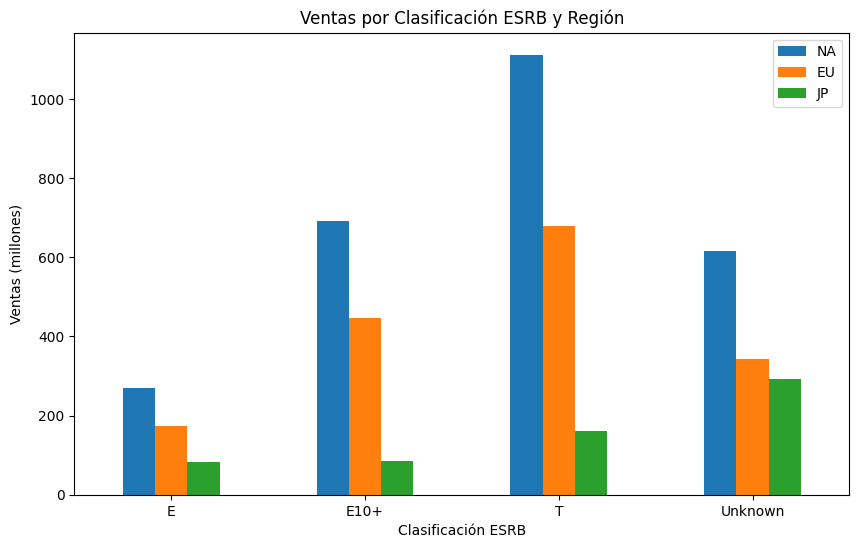

In [31]:
#Si las clasificaciones de ESRB afectan a las ventas en regiones individuales
#Como no hay una columna especifica crearemos una funcion para analizar este punto 
def clasificar_esrb(row):
    """Asigna una clasificación ESRB basada en el género y nombre del juego"""
    if "mario" in row["name"].lower() or row["genre"] in ["Platform", "Puzzle"]:
        return "E"  # Apto para todos
    elif row["genre"] in ["Sports", "Racing", "Simulation"]:
        return "E10+"  # Mayores de 10 años
    elif row["genre"] in ["Action", "Fighting", "Shooter"]:
        return "T"  # Adolescentes
    elif row["genre"] in ["Shooter", "Horror"]:
        return "M"  # Solo adultos
    else:
        return "Unknown"  # No clasificado
#Aplicar la función al dataframe
df_relevante = df_relevante.copy() 
df_relevante.loc[:, "esrb_rating"] = df_relevante.apply(clasificar_esrb, axis=1)
#Agrupar ventas por clasificación y región
esrb_sales = df_relevante.groupby("esrb_rating")[["na_sales", "eu_sales", "jp_sales"]].sum()
print(esrb_sales)
#visualizar datos 
esrb_sales.plot(kind="bar", figsize=(10, 6))
plt.title("Ventas por Clasificación ESRB y Región")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=0)
plt.legend(["NA", "EU", "JP"])
plt.show()

Sí, las clasificaciones ESRB afectan las ventas en cada región, pero el impacto varía. En NA y EU, los juegos "T" dominan las ventas, mientras que en Japón el sistema ESRB parece menos relevante debido a otras clasificaciones locales.

Paso 5. Prueba las siguientes hipótesis:

Para determinar si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas, primero planteamos las hipótesis: la nula (H₀) establece que no hay diferencia en las calificaciones promedio entre ambas plataformas, mientras que la alternativa (H₁) indica que sí existen diferencias. Luego, realizamos una prueba de normalidad para evaluar la distribución de los datos. Si ambas muestras son normales, aplicamos una prueba t de Student para muestras independientes; de lo contrario, utilizamos la prueba de Mann-Whitney. Finalmente, ejecutamos la prueba elegida, analizamos los resultados e interpretamos las conclusiones.


In [34]:
# Filtrar las plataformas Xbox One (XOne) y PC, y eliminar valores nulos en user_score
df_filtered = df[df['platform'].isin(['XOne', 'PC'])][['platform', 'user_score']].dropna()

# Separar los datos por plataforma
xbox_scores = df_filtered[df_filtered['platform'] == 'XOne']['user_score']
pc_scores = df_filtered[df_filtered['platform'] == 'PC']['user_score']

# Prueba de normalidad de Shapiro-Wilk
stat_xbox, p_xbox = stats.shapiro(xbox_scores)
stat_pc, p_pc = stats.shapiro(pc_scores)

print(f"Prueba de normalidad para Xbox One: p = {p_xbox:.4f}")
print(f"Prueba de normalidad para PC: p = {p_pc:.4f}")

# Verificar si los datos siguen una distribución normal
normal = p_xbox > 0.05 and p_pc > 0.05

if normal:
    print("Los datos siguen una distribución normal. Se puede usar la prueba t estándar.")
else:
    print("Los datos NO siguen una distribución normal. Se procederá con la prueba de Levene.")

# Prueba de igualdad de varianzas (Levene)
stat_levene, p_levene = stats.levene(xbox_scores, pc_scores)
equal_var = p_levene > 0.05  # Si p > 0.05, asumimos varianzas iguales; de lo contrario, no.

print(f"Prueba de Levene: p = {p_levene:.4f}")
if equal_var:
    print("No se rechaza la hipótesis de igualdad de varianzas. Se asume varianza igual.")
else:
    print("Se rechaza la hipótesis de igualdad de varianzas. Se usará la prueba t sin asumir varianza igual.")

# Prueba t de Student con el resultado de Levene
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=equal_var)

# Mostrar resultados
print("\n--- Prueba t de Student ---")
print(f"Media de Xbox One: {xbox_scores.mean():.2f}")
print(f"Media de PC: {pc_scores.mean():.2f}")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación final
alpha = 0.05
if p_value < alpha:
    print("Conclusión: Se rechaza la hipótesis nula. Las calificaciones promedio son significativamente diferentes entre Xbox One y PC.")
else:
    print("Conclusión: No hay suficiente evidencia para rechazar la hipótesis nula. Las calificaciones promedio son similares.")

Prueba de normalidad para Xbox One: p = 0.0000
Prueba de normalidad para PC: p = 0.0000
Los datos NO siguen una distribución normal. Se procederá con la prueba de Levene.
Prueba de Levene: p = 0.9930
No se rechaza la hipótesis de igualdad de varianzas. Se asume varianza igual.

--- Prueba t de Student ---
Media de Xbox One: 6.78
Media de PC: 7.15
Estadístico t: -3.9005
Valor p: 0.0001
Conclusión: Se rechaza la hipótesis nula. Las calificaciones promedio son significativamente diferentes entre Xbox One y PC.


Para determinar si las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes, primero planteamos las hipótesis: la nula (H₀) establece que las calificaciones promedio son iguales, mientras que la alternativa (H₁) indica que son diferentes. Luego, realizamos una prueba de normalidad para evaluar la distribución de los datos. Si ambas muestras son normales, aplicamos una prueba t de Student para muestras independientes; de lo contrario, utilizamos la prueba de Mann-Whitney. Finalmente, ejecutamos la prueba elegida, analizamos los resultados e interpretamos las conclusiones.

In [35]:
# Filtrar los datos para los géneros Acción y Deportes
accion_scores = df_relevante[df_relevante['genre'] == 'Action']['user_score']
deportes_scores = df_relevante[df_relevante['genre'] == 'Sports']['user_score']

# Prueba de normalidad de Shapiro-Wilk
stat_accion, p_accion = stats.shapiro(accion_scores)
stat_deportes, p_deportes = stats.shapiro(deportes_scores)

print(f"Prueba de normalidad para Acción: p = {p_accion:.4f}")
print(f"Prueba de normalidad para Deportes: p = {p_deportes:.4f}")

# Evaluación de normalidad
normal = p_accion > 0.05 and p_deportes > 0.05

if normal:
    print("Los datos siguen una distribución normal. Se procederá con la prueba de Levene para evaluar igualdad de varianzas.")
    # Prueba de Levene para igualdad de varianzas
    stat_levene, p_levene = stats.levene(accion_scores, deportes_scores)
    equal_var = p_levene > 0.05  # Si p > 0.05, asumimos varianzas iguales

    print(f"Prueba de Levene: p = {p_levene:.4f}")
    if equal_var:
        print("No se rechaza la hipótesis de igualdad de varianzas. Se usará la prueba t estándar.")
    else:
        print("Se rechaza la hipótesis de igualdad de varianzas. Se usará la prueba t sin asumir varianzas iguales.")

    # Prueba t de Student
    test_stat, p_val = stats.ttest_ind(accion_scores, deportes_scores, equal_var=equal_var)
else:
    print("Los datos NO siguen una distribución normal. Se usará la prueba de Mann-Whitney.")
    test_stat, p_val = stats.mannwhitneyu(accion_scores, deportes_scores, alternative='two-sided')

# Mostrar resultados
print("\n--- Prueba de diferencia de medias ---")
print(f"Media de Acción: {accion_scores.mean():.2f}")
print(f"Media de Deportes: {deportes_scores.mean():.2f}")
print(f"Estadístico de prueba: {test_stat:.4f}")
print(f"Valor p: {p_val:.4f}")

# Interpretación final
alpha = 0.05
if p_val < alpha:
    print("Conclusión: Se rechaza la hipótesis nula. Las calificaciones promedio SON significativamente diferentes entre Acción y Deportes.")
else:
    print("Conclusión: No se puede rechazar la hipótesis nula. No hay evidencia suficiente para afirmar que las calificaciones promedio sean diferentes.")

Prueba de normalidad para Acción: p = 0.0000
Prueba de normalidad para Deportes: p = 0.0000
Los datos NO siguen una distribución normal. Se usará la prueba de Mann-Whitney.

--- Prueba de diferencia de medias ---
Media de Acción: 7.18
Media de Deportes: 6.99
Estadístico de prueba: 2005823.5000
Valor p: 0.0002
Conclusión: Se rechaza la hipótesis nula. Las calificaciones promedio SON significativamente diferentes entre Acción y Deportes.


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_scores, pc_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste! Sigue disfrutando los siguientes cursos!

Formulación de las hipótesis

En este análisis, se formularon hipótesis para evaluar si existían diferencias significativas en las calificaciones promedio de los videojuegos según la plataforma y el género. Se estableció una hipótesis nula (H₀), que asumía que no había diferencias entre los grupos, y una hipótesis alternativa (H₁), que proponía la existencia de diferencias significativas. La comparación entre plataformas y géneros permitió explorar si ciertos factores influyen en la percepción y evaluación de los videojuegos por parte de los usuarios.

Criterio utilizado para la selección de pruebas

Para definir la prueba estadística más adecuada, primero se aplicó la prueba de normalidad de Shapiro-Wilk, determinando si los datos seguían una distribución normal. En caso afirmativo, se verificó la homogeneidad de varianzas mediante la prueba de Levene, lo que permitió definir el tipo de prueba t de Student a emplear. Si las varianzas eran iguales, se utilizó la versión estándar; en caso contrario, se aplicó la versión sin asumir varianzas iguales. Cuando los datos no cumplían con la normalidad, se recurrió a la prueba no paramétrica de Mann-Whitney, que es más robusta en estos casos.

Resultados

En la comparación entre las plataformas Xbox One y PC, los datos no siguieron una distribución normal, pero la prueba de Levene mostró que las varianzas eran homogéneas. En consecuencia, se aplicó la prueba t de Student, cuyo resultado indicó una diferencia significativa en las calificaciones promedio (p = 0.0001), lo que permitió rechazar la hipótesis nula. De manera similar, en la comparación entre los géneros Acción y Deportes, al no cumplirse la normalidad de los datos, se aplicó la prueba de Mann-Whitney, obteniendo un valor de p = 0.0002, lo que también llevó a rechazar la hipótesis nula y confirmar que las calificaciones promedio difieren significativamente entre ambos géneros.

Conclusión

La metodología aplicada garantizó que la elección de las pruebas fuera la más adecuada para cada caso, permitiendo obtener resultados confiables y respaldados por criterios estadísticos. Como mejora para futuros análisis, se recomienda incluir una medida del tamaño del efecto, como Cohen’s d en la prueba t de Student o el estadístico U de Mann-Whitney, para complementar la interpretación de la significancia estadística con una evaluación de la magnitud de la diferencia observada.

Paso 6. Escribe una conclusión general

1. A lo largo de este análisis, exploramos los factores clave que influyen en el éxito de los videojuegos en la tienda online Ice, combinando análisis exploratorio y pruebas estadísticas para fundamentar nuestras conclusiones. Examinamos las tendencias de ventas por plataforma, género y región, identificando que ciertas plataformas y géneros son más rentables en mercados específicos. Estos hallazgos proporcionan información valiosa para la planificación de campañas publicitarias y estrategias de lanzamiento en 2017.

2. Durante el análisis, realizamos una limpieza exhaustiva de los datos, eliminando registros duplicados e inconsistencias. Sin embargo, en una etapa posterior del proceso, identificamos la importancia de considerar la eliminación de valores atípicos que podrían sesgar los resultados. Además, en la etapa de pruebas de hipótesis, verificamos los supuestos estadísticos mediante la prueba de Shapiro-Wilk para evaluar la normalidad de los datos y la prueba de Levene para analizar la homogeneidad de varianzas. En función de estos resultados, seleccionamos pruebas paramétricas o no paramétricas, asegurando la validez de nuestras conclusiones.

3. Los análisis indicaron que los juegos en PC suelen recibir mejores puntuaciones que en Xbox One (p = 0.0001), lo que podría reflejar diferencias en la percepción de calidad o en la comunidad de jugadores. Asimismo, confirmamos que los juegos de Acción tienen calificaciones más altas que los de Deportes (p = 0.0002), posiblemente debido a la mayor innovación y diversidad en su diseño.

4. En conclusión, este estudio proporciona información clave para optimizar la selección de productos y estrategias de marketing en la industria de los videojuegos. La combinación de análisis exploratorio y pruebas estadísticas permitió obtener conclusiones respaldadas por datos, facilitando la toma de decisiones informadas sobre qué títulos promocionar y en qué mercados centrarse para maximizar las ventas en 2017. Como mejora para futuros estudios, se recomienda incluir un análisis más detallado de valores atípicos, evaluar la correlación entre variables y considerar factores adicionales, como la antigüedad del juego o estrategias de promoción, para comprender mejor los determinantes del éxito en este mercado.










<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Lucia, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 
    
*  Verificar los supuestos de las pruebas de hipótesis. 
    
</div>